In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Downloads/abcnews-date-text/abcnews-date-text.csv')
df

,publish_date,headline_text
0,20030219,aba decides against community broadcasting lic...
1,20030219,act fire witnesses must be aware of defamation
2,20030219,a g calls for infrastructure protection summit
3,20030219,air nz staff in aust strike for pay rise
4,20030219,air nz strike to affect australian travellers
...,...,...
1082163,20170630,when is it ok to compliment a womans smile a g...
1082164,20170630,white house defends trumps tweet
1082165,20170630,winter closes in on tasmania as snow ice falls
1082166,20170630,womens world cup australia wins despite atapat...


In [3]:
pip install -U textblob

Requirement already up-to-date: textblob in c:\users\me\appdata\local\programs\python\python36\lib\site-packages (0.15.3)Note: you may need to restart the kernel to use updated packages.



You should consider upgrading via the 'c:\users\me\appdata\local\programs\python\python36\python.exe -m pip install --upgrade pip' command.


In [3]:
from IPython.display import display
from tqdm import tqdm
from collections import Counter
import ast

In [4]:
import matplotlib.mlab

In [5]:
from sklearn.feature_extraction.text import CountVectorizer
from textblob import TextBlob
import scipy.stats as stats

In [6]:
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.manifold import TSNE

In [7]:
from bokeh.plotting import figure, output_file, show
from bokeh.models import Label
from bokeh.io import output_notebook
output_notebook()
%matplotlib inline

Loading BokehJS ...

In [8]:
datafile = 'Downloads/abcnews-date-text/abcnews-date-text.csv'

In [9]:
raw_data = pd.read_csv(datafile,parse_dates=[0],infer_datetime_format=True)

In [10]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1082168 entries, 0 to 1082167
Data columns (total 2 columns):
 #   Column         Non-Null Count    Dtype         
---  ------         --------------    -----         
 0   publish_date   1082168 non-null  datetime64[ns]
 1   headline_text  1082168 non-null  object        
dtypes: datetime64[ns](1), object(1)
memory usage: 16.5+ MB


In [11]:
raw_data.head(3)

,publish_date,headline_text
0,2003-02-19,aba decides against community broadcasting lic...
1,2003-02-19,act fire witnesses must be aware of defamation
2,2003-02-19,a g calls for infrastructure protection summit


In [12]:
raw_data.tail()

,publish_date,headline_text
1082163,2017-06-30,when is it ok to compliment a womans smile a g...
1082164,2017-06-30,white house defends trumps tweet
1082165,2017-06-30,winter closes in on tasmania as snow ice falls
1082166,2017-06-30,womens world cup australia wins despite atapat...
1082167,2017-06-30,youtube stunt death foreshadowed by tweet


In [13]:
reindexed_data = raw_data['headline_text']
reindexed_data.index= raw_data['publish_date']

In [14]:
reindexed_data

publish_date
2003-02-19    aba decides against community broadcasting lic...
2003-02-19       act fire witnesses must be aware of defamation
2003-02-19       a g calls for infrastructure protection summit
2003-02-19             air nz staff in aust strike for pay rise
2003-02-19        air nz strike to affect australian travellers
                                    ...                        
2017-06-30    when is it ok to compliment a womans smile a g...
2017-06-30                     white house defends trumps tweet
2017-06-30       winter closes in on tasmania as snow ice falls
2017-06-30    womens world cup australia wins despite atapat...
2017-06-30            youtube stunt death foreshadowed by tweet
Name: headline_text, Length: 1082168, dtype: object

In [15]:
reindexed_data.head()

publish_date
2003-02-19    aba decides against community broadcasting lic...
2003-02-19       act fire witnesses must be aware of defamation
2003-02-19       a g calls for infrastructure protection summit
2003-02-19             air nz staff in aust strike for pay rise
2003-02-19        air nz strike to affect australian travellers
Name: headline_text, dtype: object

In [16]:
def get_top_n_words(n_top_words,count_vectorizer, text_data):
    """Now i want ot Return the data in form of tuple
    of the n words in a simpler and their accompanying counts, give COUNTVECTORIZATION"""
    vectorized_headlines = count_vectorizer.fit_transform(text_data.values)
    vectorized_Total = np.sum(vectorized_headlines,axis=0)
    word_indeces = np.flip(np.argsort(vectorized_Total)[0,:],1)
    word_values = np.flip(np.sort(vectorized_Total)[0,:],1)
    word_vectors = np.zeros((n_top_words,vectorized_headlines.shape[1]))
    for i in range(n_top_words):
        word_vectors[i, word_indeces[0,i]]=1
    words = [word[0].encode('ascii').decode('utf-8') for word in count_vectorizer.inverse_transform(word_vectors)]
    
    return (words, word_values[0,:n_top_words].tolist()[0])

In [17]:
count_vectorizer = CountVectorizer(stop_words='english')
count_vectorizer

CountVectorizer(stop_words='english')

In [18]:
words, word_values = get_top_n_words(n_top_words=20,
                                    count_vectorizer=count_vectorizer,
                                    text_data=reindexed_data)

In [19]:
words

['police',
 'new',
 'man',
 'says',
 'govt',
 'council',
 'court',
 'interview',
 'nsw',
 'plan',
 'australia',
 'water',
 'qld',
 'wa',
 'crash',
 'death',
 'sydney',
 'health',
 'charged',
 'australian']

[Text(0, 0, 'police'),
 Text(0, 0, 'new'),
 Text(0, 0, 'man'),
 Text(0, 0, 'says'),
 Text(0, 0, 'govt'),
 Text(0, 0, 'council'),
 Text(0, 0, 'court'),
 Text(0, 0, 'interview'),
 Text(0, 0, 'nsw'),
 Text(0, 0, 'plan'),
 Text(0, 0, 'australia'),
 Text(0, 0, 'water'),
 Text(0, 0, 'qld'),
 Text(0, 0, 'wa'),
 Text(0, 0, 'crash'),
 Text(0, 0, 'death'),
 Text(0, 0, 'sydney'),
 Text(0, 0, 'health'),
 Text(0, 0, 'charged'),
 Text(0, 0, 'australian')]

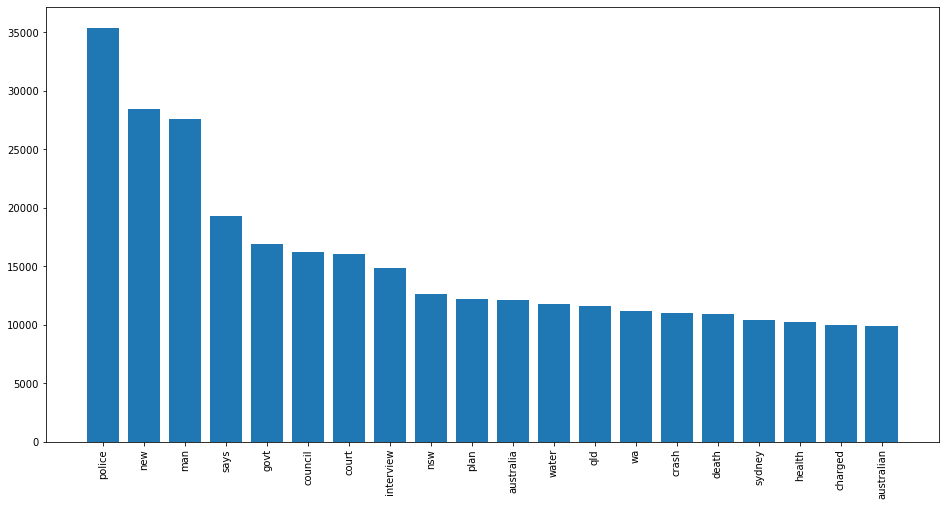

In [20]:
fig, ax = plt.subplots(figsize=(16,8))
ax.bar(range(len(words)),word_values);
ax.set_xticks(range(len(words)));
ax.set_xticklabels(words, rotation='vertical')

In [21]:
tagged_headlines = [TextBlob(reindexed_data[i]).pos_tags for i in range(reindexed_data.shape[0])]

In [22]:
tagged_headlines

[[('aba', 'JJ'),
  ('decides', 'NNS'),
  ('against', 'IN'),
  ('community', 'NN'),
  ('broadcasting', 'NN'),
  ('licence', 'NN')],
 [('act', 'NN'),
  ('fire', 'NN'),
  ('witnesses', 'NNS'),
  ('must', 'MD'),
  ('be', 'VB'),
  ('aware', 'JJ'),
  ('of', 'IN'),
  ('defamation', 'NN')],
 [('a', 'DT'),
  ('g', 'NN'),
  ('calls', 'VBZ'),
  ('for', 'IN'),
  ('infrastructure', 'NN'),
  ('protection', 'NN'),
  ('summit', 'NN')],
 [('air', 'NN'),
  ('nz', 'JJ'),
  ('staff', 'NN'),
  ('in', 'IN'),
  ('aust', 'NN'),
  ('strike', 'NN'),
  ('for', 'IN'),
  ('pay', 'NN'),
  ('rise', 'NN')],
 [('air', 'NN'),
  ('nz', 'NNS'),
  ('strike', 'NN'),
  ('to', 'TO'),
  ('affect', 'VB'),
  ('australian', 'JJ'),
  ('travellers', 'NNS')],
 [('ambitious', 'JJ'),
  ('olsson', 'NN'),
  ('wins', 'VBZ'),
  ('triple', 'JJ'),
  ('jump', 'NN')],
 [('antic', 'JJ'),
  ('delighted', 'VBD'),
  ('with', 'IN'),
  ('record', 'NN'),
  ('breaking', 'NN'),
  ('barca', 'NN')],
 [('aussie', 'RB'),
  ('qualifier', 'JJR'),
  ('stosu

In [ ]:
tagged_headlines_df = pd.DataFrame({'tags': tagged_headlines['tags']})
word_counts = []
pos_counts = {}
for headlines in tagged_headlines_df['tags']:
    word_counts.append(len(headlines))
    for tag in headlines:
        if tag[1] in pos_counts:
            pos_counts[tag[1]] += 1
        else:
            pos_counts[tag[1]] = 1
print("Total Number Words per headline",np.sum(word_counts))
print("Mean number of words per headline",np.mean(word_counts))

In [ ]:
y = stats.norm.pdf(np.linspace(0,14,50), np.mean(word_counts), np.std(word_counts))

In [ ]:
fig, ax = plt.subplots(figsize=(18,8))
ax.hist(word_counts, bins=range(1,14), density=True);
ax.plot(np.linspace(0,14,50),y,'r--', linewidth=1)
ax.set_title('Headlines word length');
ax.set_xticks(range(1,14));
ax.set_xlabel('Number of words');
plt.show()

In [ ]:
pos_sorted_types = sorted(pos_counts, key=pos_counts,__getitem__,reverse=True)
pos_sorted_counts = sorted(pos_counts.values(), reverse=True)
fig, ax = plt.subplots(figsize=(18,8))
ax.bar(range(len(pos_counts)));
ax.set_xticks(range(len(pos_counts)));
ax.set_xticklabels(pos_sorted_types);
ax.set_title('Part-of-Speech Tagging for Headlines Corpus');
ax.set_xlabel('Type of word')

In [ ]:
monthly_counts = reindexed_data.resample('M').count()
yearly_counts = reindexed_data.resample('A').count()
daily_counts = reindexed_data.resample('D').count()

In [ ]:
fig, ax = plt.subplots(3, figsize=(18,16))
ax[0].plot(daily_counts)
ax[0].set_title("Daily counts")
ax[1].plot(monthly_counts)
ax[1].set_title("Monthly counts")
ax[2].plot(yearly_counts)
ax[2].set_title("yearly counts")

In [ ]:
small_count_vectorizer = CountVectorizer(stop_words='english',max_features=40000)
small_text_samples = reindexed_data.sample(n=10000, random_state=0).values

In [ ]:
small_text_samples

In [ ]:
print("Heading before vectorization: {}".format(small_text_samples[123]))


In [ ]:
small_document_matrix = small_count_vectorizer.fit_transform(small_text_samples)

In [ ]:
print("Heading before vectorization: \n{}".format(small_document_matrix[123]))

In [ ]:
n_topics = 8

In [ ]:
lsa_model = TruncatedSVD(n_components=n_topics)
lsa_topic_matrix = lsa_model.fit_transform(small_document_matrix)

In [ ]:
def get_keys(topic_matrix):
    """return an integer list of predicted topic
    Categories for a given topic matrix
    """
    keys=topic_matrix.argmax(axis=1).tolist()
    return keys
def keys_to_counts(keys):
    """return a tuple of topics categories and there accompanying magnitudes for a given list of keys"""
    count_pairs = Counter(keys).items()
    categories = [pair[0] for pair in count_pairs]
    counts = [pair[1] for pair in count_pairs]
    return (categories,counts)

In [ ]:
lsa_keys = get_keys(lsa_topic_matrix)
lsa_keys[0:5]

In [ ]:
lsa_categories = lsa_counts = keys_to_counts(lsa_keys)
lsa_categories[0:5]

In [ ]:
lsa_counts[0:5]

In [ ]:
def get_top_n_words(n,keys,document_term_matrix,count_vectorizer):
    top_word_indices = []
    for topic in range(n_topics):
        temp_vector_sum = 0
        for i in range(len(keys)):
            if keys[i] ==topic:
                temp_vector_sum += document_term_matrix[i]
        temp_vector_sum = temp_vector_sum.toarray()
        top_n_word_indices = np.flip(np.argsort(temp_vector_sum)[0][-n:],0)
        top_words = []
        for topic in top_word_indices:
            top_words = []
            for index in topic:
                temp_word_vector = np.zeros((1,document_term_matrix.shape[1]))
                temp_word_vector[:,index] = 1
                the_word = count_vectorizer.inverse_transform(temp_word_vector)[0][0]
                topic_words.append(the_word.encode('ascii').decode('utf-8'))
            top_words.append(" ".join(topic_words))
        return top_words

        

In [ ]:
top_n_words_lsa = get_top_n_words(20, lsa_keys, small_document_matrix, small_count_vectorizer)
for i in range(len(top_n_words_lsa)):
    print("Topic {}:".format(i+1), top_n_words_lsa[i])

import nltk
download.nltk('punkt')

In [ ]:
top_3_words = get_top_n_words(3, lsa_keys, small_document_matrix, small_count_vectorizer)
#labels = ['Topic {}: \n'.format(i) + top_3_words[i] for i in lsa_categories]
fig, ax = plt.subplots(figsize=(16,8))
ax.bar(lsa_categories, lsa_counts)
ax.set_xticks(lsa_categories)
ax.set_ylabel('Number of Headlines');
ax.set_title('LSA topic counts');
plt.show()

In [ ]:
tsne_lsa_model = TSNE(n_components=2,perplexity=50,learning_rate=100,
                     n_iter=2000,verbose=1,random_state=0,angle=0.75)


In [ ]:
tsne_lsa_vector = tsne_lsa_model.fit_transform(lsa_topic_matrix)

In [ ]:
colormap = np.array([
    "#1f77b4", "#aec7e8", "#ff7f0e", "#ffbb78", "#2ca02c",
    "#98df8a", "#d62728", "#ff9896", "#9467bd", "#c5b0d5",
    "#8c564b", "#c49c94", "#e377c2", "#f7b6d2", "#7f7f7f",
    "#c7c7c7", "#bcbd22", "#dbdb8d", "#17becf", "#9edae5" ])
colormap = colormap[:n_topics]


In [ ]:
def get_mean_topic_vectors(keys,two_dim_vectors):
    mean_topic_vectors = []
    for t in range(n_topics):
        articles_in_that_topic = []
        for i in range(len(keys)):
            if keys[i] == t:
                articles_in_that_topic.append(two_dim_vectors[i])
            articles_in_that_topic = np.vstack(articles_in_that_topic)
            mean_articles_in_that_topic = np.mean(articles_in_that_topic,axis=0)
            mean_topic_vectors.append(mean_articles_in_that_topic)
        return mean_topic_vectors
            

In [ ]:
top_3_words_lsa = get_top_n_words(3, lsa_keys, small_document_matrix,small_count_vectorizer)
lsa_mean_topic_vectors = get_mean_topic_vectors(lsa_keys,tsne_lsa_vectors)

In [ ]:
plot = figure(title="t-SNE Clustering of {} LSA Topics".format(n_topics), plot_width=700, plot_height=700)
plot.scatter(x=tsne_lsa_vectors[:,0],
             y=tsne_lsa_vectors[:,1],
             color=colormap[lsa_keys])
for t in range(n_topics):
  label = Label(x=lsa_mean_topic_vectors[t][0],
                y=tsne_lsa_vectors[t][1],
                
                text_color=colormap[t])
  plot.add_layout(label)
  show(plot)